# Long term bicycle traffic trends in Cologne for year 2020, 2021, 2022

## Contents
1. Summary
2. Datasets
3. Install dependencies and load data
4. Question and their analysis

The question that interests us are:
1. **Has there been an overall increase or decrease in bicycle traffic volume in Cologne over the years?**

## 1. Summary

In this project we try to analyze the bicycle traffic data of Cologne(köln) over three consecutive years i.e. 2020, 2021, 2022. Here we mainly try to observe if there has been an increase or decrease in the total traffic of bicycle in Cologne over the years. These findings can be used to improve the overall bike road infrastructure of the city to better handle the overall increasing bicycle traffic.

The main question which we will try to answer is,
1. **Has there been an overall increase or decrease in bicycle traffic volume in Cologne over the years?**

## 2. Datasets

We have taken three datasets to answer our question
1. Datasource1 : Bicycle Traffic Data Cologne 2022
        URL : https://offenedaten-koeln.de/sites/default/files/Radverkehr%20für%20Offene%20Daten%20Köln%202022.csv
        Description : Contains month-wise distribution number of cyclists passing on different streets for year 2022.

2. Datasource2 : Bicycle Traffic Data Cologne 2021
        URL : https://offenedaten-koeln.de/sites/default/files/Radverkehr%20für%20Offene%20Daten%20Köln%202021.csv
        Description : Contains month-wise distribution number of cyclists passing on different streets for year 2021.

3. Datasource3: Bicycle Traffic Data Cologne 2020
        URL: https://offenedaten-koeln.de/sites/default/files/Fahrrad_Zaehlstellen_Koeln_2020.csv
        Description : Contains month-wise distribution number of cyclists passing on different streets for year 2020.

## 3.1 Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [59]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 3.2 Load data
Create a pandas dataframe using the local sqlite file.

In [62]:
import pandas as pd

df_bike_2022 = pd.read_sql_table('Bicycle_Traffic_Data_Cologne_2022', 'sqlite:///data/AMSE_database.sqlite')
df_bike_2021 = pd.read_sql_table('Bicycle_Traffic_Data_Cologne_2021', 'sqlite:///data/AMSE_database.sqlite')
df_bike_2020 = pd.read_sql_table('Bicycle_Traffic_Data_Cologne_2020', 'sqlite:///data/AMSE_database.sqlite')

Some results from our Exploratory Data Analysis are
* In all the years the street with most bikers has been : Venloer Straße
* And the street with the least bikers has been : Vorgebirgspark
* And Venloer Straße had most number of bikers in the month of : June

## 4. Question and their analysis

### 1. Has there been an overall increase or decrease in bicycle traffic volume in Cologne over the years?
To answer our question, we will plot a Bar chart with the help of Seaborn and Matplotlib libraries. On the X-axis we are plotting the years i.e. 2020, 2021, 2022, and on the Y-axis we are plotting the traffic volume depending on the years.

What we can observe is that there has been quite a jump for the year 2022 compared to that of 2020 and 2021. There could be many reasons for it, but one that I can think of is that for the year 2020 and 2021 there were many restrictions due to covid pandemic. But as in the year 2022 the restricts started to go down, the bike traffic started rising again.

To conclude we can see that, overall year on year the Bicycle traffic in Cologne has increased.

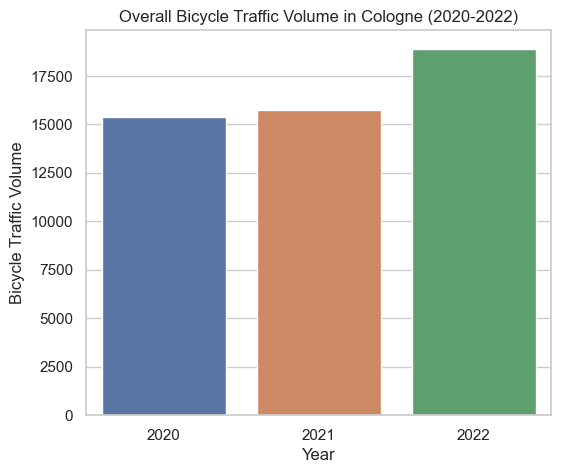

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Overall increase or decrease in bicycle traffic volume
total_traffic_volume_2020 = df_bike_2020.drop('Month', axis=1).sum().sum()
total_traffic_volume_2021 = df_bike_2021.drop('Month', axis=1).sum().sum()
total_traffic_volume_2022 = df_bike_2022.drop('Month', axis=1).sum().sum()

traffic_volume_over_years = pd.DataFrame({
    'Year': ['2020', '2021', '2022'],
    'Traffic Volume': [total_traffic_volume_2020, total_traffic_volume_2021, total_traffic_volume_2022]
})

plt.figure(figsize=(6, 5))
sns.barplot(x='Year', y='Traffic Volume', data=traffic_volume_over_years)
plt.xlabel('Year')
plt.ylabel('Bicycle Traffic Volume')
plt.title('Overall Bicycle Traffic Volume in Cologne (2020-2022)')
plt.show()